In [1]:
from imports import *
from funcs import *

<Figure size 3000x6000 with 0 Axes>

interactive(children=(IntSlider(value=0, description='Month', max=11), Output()), _dom_classes=('widget-intera…

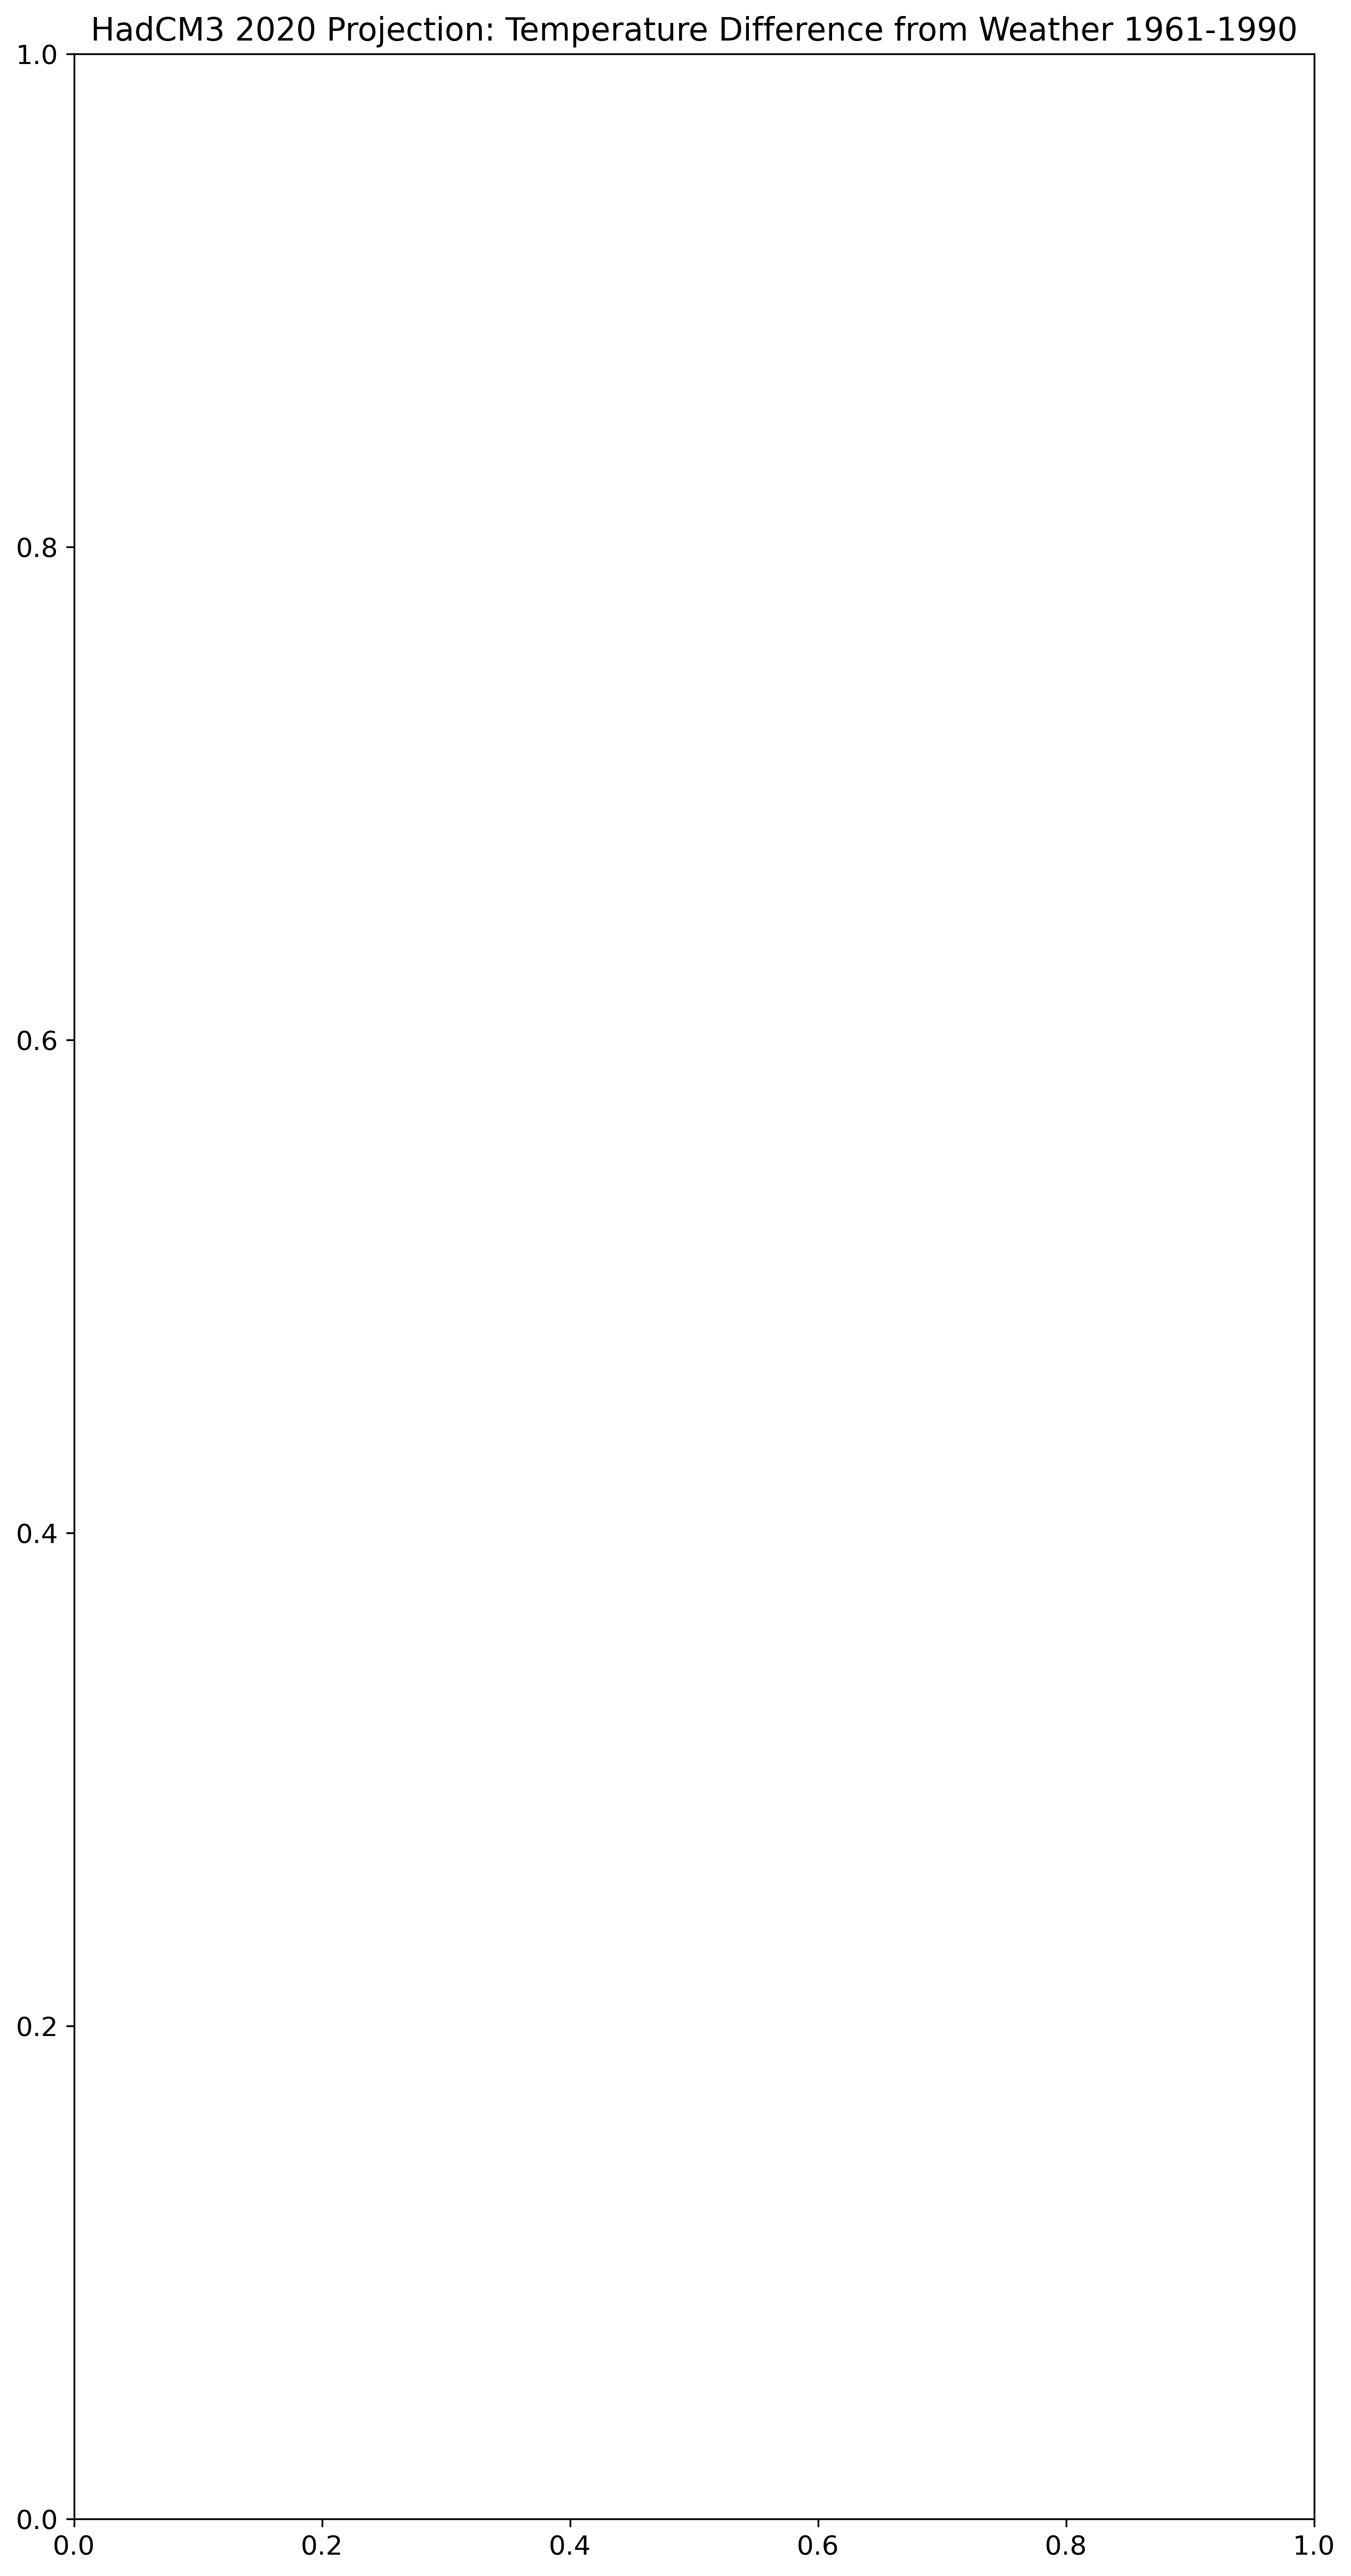

In [125]:
weather = "weather-data\A2a\HADCM3_A2a_TEMP_2020.dif"

global temps_mat

temps_mat = conv(weather)[0]
temps_df = conv(weather)[1]

fig = plt.figure()


def plotter(month):
    ax = plt.axes(projection=ccrs.PlateCarree())

    data, lons = add_cyclic_point(temps_mat[month], coord = longitudes)

    cs = ax.contourf(lons, latitudes, data, levels = np.arange(-6, 14, 1.5),
        transform = ccrs.PlateCarree(),cmap='Reds',extend='both')
    
    cb = plt.colorbar(cs, ticks = cs.levels, orientation = 'horizontal', location = 'top', 
                      shrink = 0.75, aspect = 50, pad = 0.01)
    cb.set_label('Temperature Difference [°C]', fontsize = 8)
    cb.ax.tick_params(labelsize=8)

    ax.coastlines()

    ax.set_xticks(np.arange(-180,181,30), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)

    ax.set_yticks(np.arange(-90,91,15), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    ax.yaxis.set_major_formatter(lat_formatter)

    ax.tick_params(axis='both', which='major', labelsize=8)

    ax.gridlines()
    plt.rcParams['figure.figsize'] = [10, 20]

    return 


month_slider = widgets.IntSlider(
                value=0,
                min=0,
                max=11,
                step=1,
                continuous_update=True,
                readout=True,
                description = 'Month',)
    
interact(plotter, month = month_slider)

plt.title("HadCM3 2020 Projection: Temperature Difference from Weather 1961-1990")
plt.show()


In [72]:
long_mesh, lat_mesh = np.meshgrid(longitudes, latitudes)
coords = np.column_stack((long_mesh.ravel(), lat_mesh.ravel()))